In [1]:
# Import Libraries
import pandas as pd 
import re 
from quality_control import filter_low_counts 
from impute import impute_missing_values
from Normalize import normalize_rnaseq_data 
from Visualize import visualize 
from differential_analysis import run_differential_analysis
from GSEA import run_gsea_analysis

In [3]:
# Read Input Data
df = pd.read_csv('protein_expression.csv', sep = ',', dtype={0: str})
df = df.set_index(df.columns[0], drop=True)
print(df.shape)
df.head()

(100, 50)


,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_41,Sample_42,Sample_43,Sample_44,Sample_45,Sample_46,Sample_47,Sample_48,Sample_49,Sample_50
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ALB,106.0,131.2,130.9,104.6,116.7,113.8,73.7,158.8,144.0,148.9,...,122.0,141.8,100.9,91.7,127.6,139.0,120.3,152.5,110.5,122.9
AGT,136.3,122.8,116.6,104.5,150.3,170.1,134.4,78.8,118.2,139.9,...,118.8,136.2,139.4,126.5,152.4,104.0,118.2,133.7,141.0,139.8
APOA1,132.1,85.9,111.1,105.9,163.4,92.9,138.7,96.9,106.8,121.9,...,124.8,134.8,162.0,124.7,84.9,134.3,133.1,96.6,128.7,106.0
APOB,100.2,97.1,127.5,134.2,125.0,146.5,82.1,161.3,136.9,141.4,...,106.2,89.6,108.6,108.7,84.7,118.7,114.4,78.4,114.3,123.1
B2M,134.5,132.2,127.0,100.1,128.5,117.2,156.1,99.8,155.6,141.2,...,82.9,140.1,128.5,171.5,133.1,119.7,129.4,93.0,122.2,122.5


In [4]:
### 1. quality control 
# Filter out low counts
df_filtered = filter_low_counts(df)
print(df_filtered.shape)
df_filtered.head()

            Sample_1  Sample_2  Sample_3  Sample_4  Sample_5  Sample_6  \
Unnamed: 0                                                               
ALB            106.0     131.2     130.9     104.6     116.7     113.8   
 AGT           136.3     122.8     116.6     104.5     150.3     170.1   
 APOA1         132.1      85.9     111.1     105.9     163.4      92.9   
 APOB          100.2      97.1     127.5     134.2     125.0     146.5   
 B2M           134.5     132.2     127.0     100.1     128.5     117.2   
...              ...       ...       ...       ...       ...       ...   
 MAPK1         133.4     146.0     157.6     140.1     138.5     142.6   
 AKT1          119.7     130.7     160.7     141.3     117.9     170.6   
 MTOR          123.3     142.4     117.5     148.1     130.6     152.7   
 STAT3         146.3      91.2     119.2     130.8     149.3     134.5   
 SRC            89.2     115.3     118.8     123.2     134.0     164.3   

            Sample_7  Sample_8  Sampl

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_41,Sample_42,Sample_43,Sample_44,Sample_45,Sample_46,Sample_47,Sample_48,Sample_49,Sample_50
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ALB,106.0,131.2,130.9,104.6,116.7,113.8,73.7,158.8,144.0,148.9,...,122.0,141.8,100.9,91.7,127.6,139.0,120.3,152.5,110.5,122.9
AGT,136.3,122.8,116.6,104.5,150.3,170.1,134.4,78.8,118.2,139.9,...,118.8,136.2,139.4,126.5,152.4,104.0,118.2,133.7,141.0,139.8
APOA1,132.1,85.9,111.1,105.9,163.4,92.9,138.7,96.9,106.8,121.9,...,124.8,134.8,162.0,124.7,84.9,134.3,133.1,96.6,128.7,106.0
APOB,100.2,97.1,127.5,134.2,125.0,146.5,82.1,161.3,136.9,141.4,...,106.2,89.6,108.6,108.7,84.7,118.7,114.4,78.4,114.3,123.1
B2M,134.5,132.2,127.0,100.1,128.5,117.2,156.1,99.8,155.6,141.2,...,82.9,140.1,128.5,171.5,133.1,119.7,129.4,93.0,122.2,122.5


In [5]:
### 1.5 randomly generating case_samples and control_samples 
with open('sample_label.csv', 'r') as fin:
        lines = fin.readlines()
labels = [int(line.strip().split(',')[1]) for line in lines]
labels

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0]

In [6]:
patient_names = df_filtered.columns.tolist()
print(patient_names, len(patient_names))

['Sample_1', 'Sample_2', 'Sample_3', 'Sample_4', 'Sample_5', 'Sample_6', 'Sample_7', 'Sample_8', 'Sample_9', 'Sample_10', 'Sample_11', 'Sample_12', 'Sample_13', 'Sample_14', 'Sample_15', 'Sample_16', 'Sample_17', 'Sample_18', 'Sample_19', 'Sample_20', 'Sample_21', 'Sample_22', 'Sample_23', 'Sample_24', 'Sample_25', 'Sample_26', 'Sample_27', 'Sample_28', 'Sample_29', 'Sample_30', 'Sample_31', 'Sample_32', 'Sample_33', 'Sample_34', 'Sample_35', 'Sample_36', 'Sample_37', 'Sample_38', 'Sample_39', 'Sample_40', 'Sample_41', 'Sample_42', 'Sample_43', 'Sample_44', 'Sample_45', 'Sample_46', 'Sample_47', 'Sample_48', 'Sample_49', 'Sample_50'] 50


In [7]:
case_samples = [patient for label,patient in zip(labels, patient_names) if label==1]
control_samples = [patient for label,patient in zip(labels, patient_names) if label==0]
print('case vs control:')
print(case_samples, len(case_samples))
print("-----")
print(control_samples, len(control_samples))

case vs control:
['Sample_2', 'Sample_6', 'Sample_8', 'Sample_10', 'Sample_11', 'Sample_12', 'Sample_15', 'Sample_20', 'Sample_22', 'Sample_24', 'Sample_26', 'Sample_27', 'Sample_34', 'Sample_35', 'Sample_37', 'Sample_41', 'Sample_44', 'Sample_46', 'Sample_47'] 19
-----
['Sample_1', 'Sample_3', 'Sample_4', 'Sample_5', 'Sample_7', 'Sample_9', 'Sample_13', 'Sample_14', 'Sample_16', 'Sample_17', 'Sample_18', 'Sample_19', 'Sample_21', 'Sample_23', 'Sample_25', 'Sample_28', 'Sample_29', 'Sample_30', 'Sample_31', 'Sample_32', 'Sample_33', 'Sample_36', 'Sample_38', 'Sample_39', 'Sample_40', 'Sample_42', 'Sample_43', 'Sample_45', 'Sample_48', 'Sample_49', 'Sample_50'] 31


In [8]:
### 2.missing data imputation
# Perform missing data imputation
df_imputed = impute_missing_values(df_filtered)
print(df_imputed.shape)
df_imputed.head()

(100, 50)


,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_41,Sample_42,Sample_43,Sample_44,Sample_45,Sample_46,Sample_47,Sample_48,Sample_49,Sample_50
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ALB,106.0,131.2,130.9,104.6,116.7,113.8,73.7,158.8,144.0,148.9,...,122.0,141.8,100.9,91.7,127.6,139.0,120.3,152.5,110.5,122.9
AGT,136.3,122.8,116.6,104.5,150.3,170.1,134.4,78.8,118.2,139.9,...,118.8,136.2,139.4,126.5,152.4,104.0,118.2,133.7,141.0,139.8
APOA1,132.1,85.9,111.1,105.9,163.4,92.9,138.7,96.9,106.8,121.9,...,124.8,134.8,162.0,124.7,84.9,134.3,133.1,96.6,128.7,106.0
APOB,100.2,97.1,127.5,134.2,125.0,146.5,82.1,161.3,136.9,141.4,...,106.2,89.6,108.6,108.7,84.7,118.7,114.4,78.4,114.3,123.1
B2M,134.5,132.2,127.0,100.1,128.5,117.2,156.1,99.8,155.6,141.2,...,82.9,140.1,128.5,171.5,133.1,119.7,129.4,93.0,122.2,122.5


In [9]:
### 3. normalize 
df, case_df_cpm, control_df_cpm = normalize_rnaseq_data(df_imputed, case_samples, control_samples)
print('normalize', df.shape)
print(case_df_cpm.shape, case_df_cpm)
print(control_df_cpm.shape, control_df_cpm)

normalize (100, 50)
(100, 19)                 Sample_2      Sample_6      Sample_8     Sample_10  \
Unnamed: 0                                                           
ALB         10653.501364   9228.099482  12655.705827  11699.628346   
 AGT         9971.417435  13793.494920   6280.035385  10992.464779   
 APOA1       6975.120177   7533.307925   7722.530822   9578.137645   
 APOB        7884.565415  11879.758999  12854.945528  11110.325374   
 B2M        10734.701832   9503.807199   7953.648876  11094.610628   
...                  ...           ...           ...           ...   
 MAPK1      11855.268286  11563.506029  12081.895487  12760.373697   
 AKT1       10612.901130  13834.040172  10822.700575  12579.654118   
 MTOR       11562.946603  12382.520131  10480.008288   8383.816955   
 STAT3       7405.482656  10906.672938  10830.670163   8580.251279   
 SRC         9362.413928  13323.169990   7834.105055  11534.623514   

               Sample_11     Sample_12     Sample_15     Sa

(200, 50)


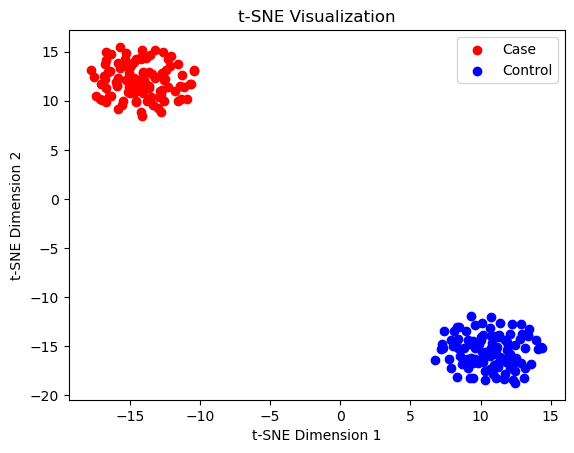

In [10]:
### 4. visualize 
case_df_cpm = case_df_cpm[:1000]
control_df_cpm = control_df_cpm[:1000]
stream = visualize(case_df_cpm, control_df_cpm) 

In [11]:
### 5. differential analysis 
genename_list_short = df.index.tolist() 
print(genename_list_short)

['ALB', ' AGT', ' APOA1', ' APOB', ' B2M', ' CALM1', ' CA2', ' CAT', ' C3', ' SERPINA5', ' CKM', ' CYP3A4', ' FTL', ' FGA', ' GAST', ' GCG', ' GPX1', ' HBA1', ' HIST1H1B', ' HIST1H2AB', ' HIST1H2BB', ' HIST1H3A', ' HIST1H4A', ' IGHA1', ' IGHG1', ' IGHD', ' IGHE', ' IGHM', ' INS', ' IFNG', ' KRT1', ' LTF', ' LIPA', ' LYZ', ' MB', ' OXT', ' PGA5', ' PRTN3', ' PRL', ' F2', ' REN', ' RNASE1', ' ALB', ' HTR2A', ' SOM', ' TSHB', ' TF', ' PRSS1', ' GC', ' VWF', ' ACTB', ' TPM1', ' TNNT2', ' TTN', ' MYH7', ' COL1A1', ' ELN', ' FN1', ' LAMA2', ' ITGAV', ' CDH1', ' SELP', ' CD79A', ' HSP90AA1', ' KRT5', ' TUBB', ' DYNC1H1', ' KIF5B', ' MYH6', ' TNNC1', ' VIM', ' LDHA', ' EGFR', ' GNAQ', ' JUN', ' SLC2A1', ' IGHG1', ' GH1', ' IFNG', ' HIST1H2BJ', ' HNRNPA1', ' SRSF2', ' HSPA5', ' RPL7', ' CYCS', ' PEX5', ' CTSD', ' CALR', ' GOLGB1', ' CETN2', ' KRT8', ' PER1', 'PTEN', ' TP53', ' ESR1', ' MAPK1', ' AKT1', ' MTOR', ' STAT3', ' SRC']


In [12]:
significant_genes, significant_cases, significant_controls = run_differential_analysis(genename_list_short, case_df_cpm, control_df_cpm) 
print('significant_genes', significant_genes)

significant_genes              0
0          ALB
1          AGT
2         APOB
3          CAT
4       CYP3A4
5     HIST1H1B
6     HIST1H3A
7           F2
8          REN
9       RNASE1
10        TSHB
11      COL1A1
12        KRT5
13      SLC2A1
14       IGHG1
15        IFNG
16   HIST1H2BJ
17       HSPA5
18        PTEN
19        TP53


['ALB', ' AGT', ' APOB', ' CAT', ' CYP3A4', ' HIST1H1B', ' HIST1H3A', ' F2', ' REN', ' RNASE1', ' TSHB', ' COL1A1', ' KRT5', ' SLC2A1', ' IGHG1', ' IFNG', ' HIST1H2BJ', ' HSPA5', 'PTEN', ' TP53']
{'shortId': '6cf4a2e75c736ee28693a8ed36850e47', 'userListId': 65458583}
{'KEGG_2021_Human': [[1, 'Diabetic cardiomyopathy', 1.4044084064135486e-06, 33.303030303030305, 448.78811979347256, ['COL1A1', 'SLC2A1', 'PTEN', 'REN', 'AGT'], 0.00018257309283376132, 0, 0], [2, 'Pathways in cancer', 9.610689043387153e-06, 15.881632653061224, 183.47469947808347, ['IFNG', 'SLC2A1', 'PTEN', 'F2', 'TP53', 'AGT'], 0.000624694787820165, 0, 0], [3, 'Central carbon metabolism in cancer', 4.484955367711733e-05, 52.4486391571554, 525.1261034781696, ['SLC2A1', 'PTEN', 'TP53'], 0.001792327780068094, 0, 0], [4, 'Thyroid hormone synthesis', 5.514854707901827e-05, 48.794117647058826, 478.44975239130736, ['HSPA5', 'ALB', 'TSHB'], 0.001792327780068094, 0, 0], [5, 'Insulin resistance', 0.00016326661819608508, 33.4033613445

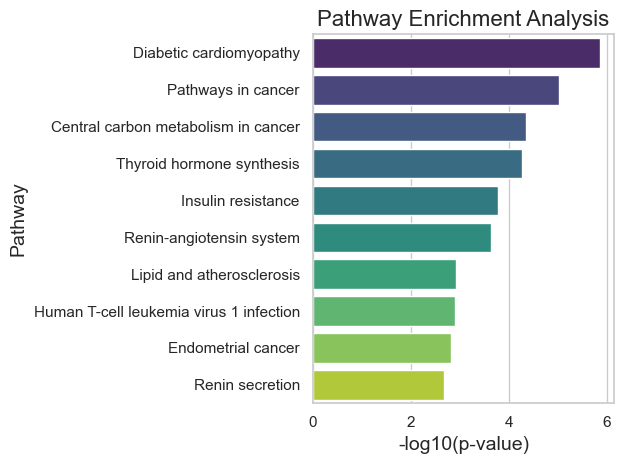

In [16]:
### 6. GSEA 
significant_genes = significant_genes[0].tolist() 
stream = run_gsea_analysis(significant_genes, 'pathway_with_pvalues.csv')

In [14]:
# Congratulations! Protein workflow completed